### Load Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

### Prepare data

In [4]:
mnist = fetch_openml('mnist_784')

In [8]:
# print(mnist.DESCR)

In [9]:
X = mnist.data
Y = mnist.target

### Analyze data

In [10]:
pd.Series(Y).value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
dtype: int64

In [11]:
print(X.shape)
print(Y.shape)

(70000, 784)
(70000,)


In [12]:
np.unique(Y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [13]:
idx = (Y=='0')|(Y=='2')
X_new = X[idx]
Y_new = Y[idx]

In [14]:
print(X_new.shape)
print(Y_new.shape)

(13893, 784)
(13893,)


In [15]:
np.unique(Y_new)

array(['0', '2'], dtype=object)

### Split data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(X_new, Y_new,
                                               test_size=.20,
                                               random_state=10)

In [18]:
print(xtrain.shape, xtest.shape)

(11114, 784) (2779, 784)


In [19]:
print(ytrain.shape, ytest.shape)

(11114,) (2779,)


## Feature Scaling 
- Standard Scaler
- Minmax Scaler

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [21]:
print(xtrain.min(), xtrain.max())
print(xtest.min(), xtest.max())

0.0 255.0
0.0 255.0


### FS - Method 1

In [36]:
# std = StandardScaler()
minmax = MinMaxScaler(feature_range=(0,1))
scaled_training_data = minmax.fit_transform(xtrain)
scaled_testing_data = minmax.fit_transform(xtest)

In [37]:
# print(xtrain.var())
# print(xtrain.std())
# print(scaled_training_data.var())
# print(scaled_training_data.std())
print(scaled_training_data.min(), scaled_testing_data.min())
print(scaled_training_data.max(), scaled_testing_data.max())

0.0 0.0
1.0 1.0


### FS : Method 2

In [38]:
xtrain_scaled = xtrain/255.0
xtest_scaled = xtest/255.0

In [41]:
print(xtrain_scaled.max(),xtrain_scaled.min())

1.0 0.0


### Feature selection - PCA


In [43]:
from sklearn.decomposition import PCA

In [45]:
xtest_scaled.shape, xtrain_scaled.shape

((2779, 784), (11114, 784))

In [46]:
pca = PCA(.98)
# - By feature number
# - By percentage

In [47]:
xtrain_selected = pca.fit_transform(xtrain_scaled)
xtrain_selected.shape

(11114, 233)

In [48]:
xtest_selected = pca.transform(xtest_scaled)
print(xtest_selected.shape)

(2779, 233)


### Train Model

In [49]:
lg = LogisticRegression()
lg.fit(xtrain_selected, ytrain)

LogisticRegression()

In [50]:
print("Training Score: ", lg.score(xtrain_selected, ytrain))
print("Testing Score: ", lg.score(xtest_selected, ytest))

Training Score:  0.9950512866654669
Testing Score:  0.990644116588701


### Prediction

In [52]:
prediction = lg.predict(xtest_selected)

### Evaluation

In [53]:
accuracy_score(ytest, prediction)

0.990644116588701

2


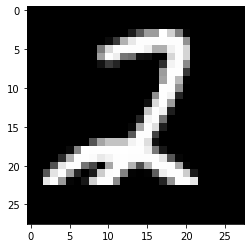

In [56]:
plt.imshow(xtest[7].reshape(28,28), cmap='gray')
print(prediction[7])

In [63]:
lg.predict_proba(xtest_selected[100].reshape(1,-1))
# print(ytest[100])

array([[1.72214337e-07, 9.99999828e-01]])

In [64]:
pd.Series(ytest).value_counts()

2    1436
0    1343
dtype: int64

In [65]:
confusion_matrix(ytest,prediction)

array([[1332,   11],
       [  15, 1421]], dtype=int64)

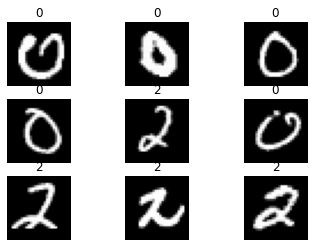

In [67]:
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(xtest[i].reshape(28,28), cmap='gray')
    plt.title(prediction[i])
    plt.axis('off')

### Let's validate on real data

In [69]:
!pip install opencv-python

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [68]:
import cv2

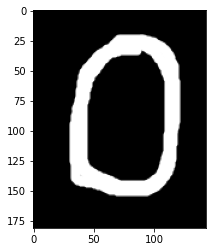

In [71]:
img = cv2.imread('test.png',2)
plt.imshow(img, cmap='gray')

(181, 144)
(28, 28)
(1, 784)
(1, 233)
Prediction:  0


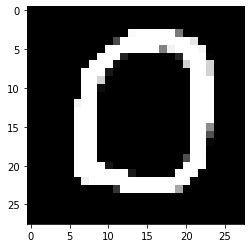

In [78]:
print(img.shape)
img1 = cv2.resize(img, (28,28))
plt.imshow(img1, cmap='gray')
print(img1.shape)
imm = img1.reshape(1,-1)/255
print(imm.shape)
final = pca.transform(imm)
print(final.shape)
print("Prediction: ", lg.predict(final)[0])

### Read images  from folders

In [83]:
import os
data = []
for file_name in os.listdir('test/'):
    img = cv2.imread('test/'+file_name, 2)
    data.append(cv2.resize(img,(28,28)))
    print(file_name,'imported successfully!')


00.png imported successfully!
a.png imported successfully!
ab.png imported successfully!
t0.png imported successfully!
t01.png imported successfully!
t1.png imported successfully!
t2.png imported successfully!
t21.png imported successfully!
t223.png imported successfully!
t23.png imported successfully!
t3.png imported successfully!
test.png imported successfully!


In [86]:
dataset = np.array(data)

In [87]:
dataset.shape

(12, 28, 28)

In [88]:
final_ds = dataset.reshape(len(dataset), -1)
print(final_ds.shape)

(12, 784)


In [89]:
x_preprocessed = pca.transform(final_ds/255)

In [90]:
x_preprocessed.shape

(12, 233)

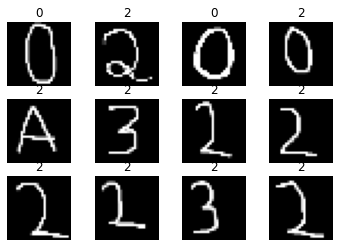

In [91]:
predictions = lg.predict(x_preprocessed)
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(data[i], cmap='gray')
    plt.title(predictions[i])
    plt.axis('off')

### Save/Export model to a file

In [92]:
import pickle

In [95]:
filename = "model.pkl"
file = open(filename,"wb")
pickle.dump(lg, file)
file.close()
print("model exported successfully!")

model exported successfully!


In [96]:
fl = open('pca.pkl','wb')
pickle.dump(pca,fl)
fl.close()